# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [30]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests


# Import API key
from api_keys import geoapify_key

In [39]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [61]:
#My CODE 
import cartopy
import geoviews

mapplot = city_data_df.hvplot.points(
    "Lng",
    "Humidity",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = .01
)
mapplot


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Humidity]

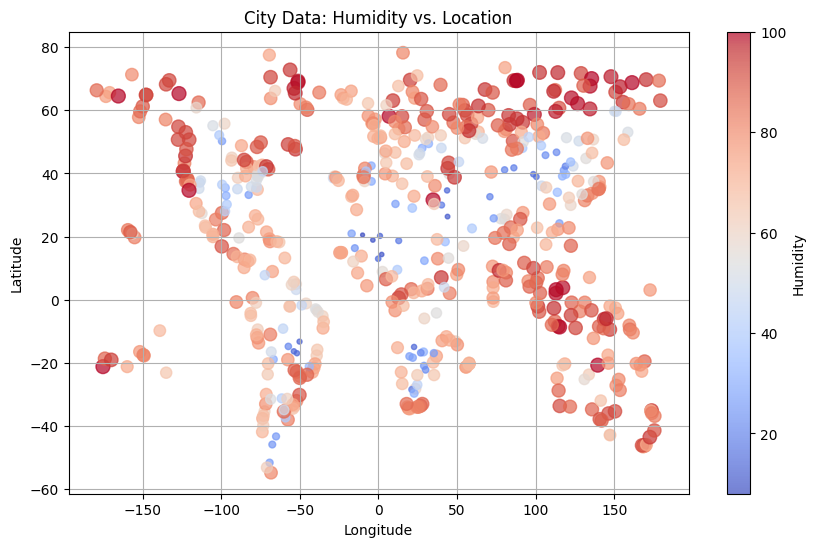

In [5]:
import matplotlib.pyplot as plt

#%%capture --no-display

# Configure the map plot
# YOUR CODE HERE


plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lng'], city_data_df['Lat'], s=city_data_df['Humidity'], alpha=0.7, c=city_data_df['Humidity'], cmap='coolwarm')
plt.colorbar(label='Humidity')  # Add colorbar for reference

# Customize the plot (add labels, title, etc.)
#%%capture --no-display

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Data: Humidity vs. Location')
plt.grid(True)

# Show the plot

plt.show()

# Display the map
# YOUR CODE HERE

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [77]:
# Filter the DataFrame based on specified conditions
filtered_df = city_data_df[
    (city_data_df['Max Temp'] > 21) & (city_data_df['Max Temp'] < 27) &
    (city_data_df['Wind Speed'] < 4.5) & (city_data_df['Cloudiness'] == 0)
]


filtered_df.size
# Drop rows with null values
newdf = filtered_df.dropna(inplace=False)

newdf

# Display the resulting DataFrame
#print(filtered_df[['City', 'Country', 'Lat', 'Lng', 'Humidity','Cloudiness','Wind Speed','Date'	]])

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
45,kapaa,22.0752,-159.3190,22.99,84,0,3.60,US,1666108257
51,hilo,19.7297,-155.0900,26.27,83,0,2.57,US,1666108260
63,banda,25.4833,80.3333,24.62,52,0,2.68,IN,1666108268
81,makakilo city,21.3469,-158.0858,21.66,81,0,2.57,US,1666108282
152,kahului,20.8947,-156.4700,23.80,60,0,3.09,US,1666108246
197,gat,31.6100,34.7642,24.38,100,0,3.69,IL,1666108356
211,laguna,38.4210,-121.4238,21.67,79,0,2.06,US,1666108364
240,tikaitnagar,26.9500,81.5833,23.56,59,0,0.35,IN,1666108378
265,san quintin,30.4833,-115.9500,21.20,74,0,1.37,MX,1666108394


In [80]:
# Assuming 'filtered_df' is your existing DataFrame
selected_columns = ['City', 'Country', 'Lat', 'Lng','Humidity']
hotel_df = filtered_df[selected_columns]

# Now 'new_df' contains the specified columns
#print(new_df)
hotel_df

,City,Country,Lat,Lng,Humidity
City_ID,,,,,
45,kapaa,US,22.0752,-159.3190,84
51,hilo,US,19.7297,-155.0900,83
63,banda,IN,25.4833,80.3333,52
81,makakilo city,US,21.3469,-158.0858,81
152,kahului,US,20.8947,-156.4700,60
197,gat,IL,31.6100,34.7642,100
211,laguna,US,38.4210,-121.4238,79
240,tikaitnagar,IN,26.9500,81.5833,59
265,san quintin,MX,30.4833,-115.9500,74


### Step 3: Create a new DataFrame called `hotel_df`.

In [83]:
hotel_df["Hotelname"] = ""
hotel_df

/var/folders/1y/lrsrz62n53qfv18krp557w8w0000gn/T/ipykernel_14016/2619425321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df["Hotelname"] = ""


,City,Country,Lat,Lng,Humidity,Hotelname
City_ID,,,,,,
45,kapaa,US,22.0752,-159.3190,84,
51,hilo,US,19.7297,-155.0900,83,
63,banda,IN,25.4833,80.3333,52,
81,makakilo city,US,21.3469,-158.0858,81,
152,kahului,US,20.8947,-156.4700,60,
197,gat,IL,31.6100,34.7642,100,
211,laguna,US,38.4210,-121.4238,79,
240,tikaitnagar,IN,26.9500,81.5833,59,
265,san quintin,MX,30.4833,-115.9500,74,


In [84]:
hotel_df["Lat"] 

City_ID
45     22.0752
51     19.7297
63     25.4833
81     21.3469
152    20.8947
197    31.6100
211    38.4210
240    26.9500
265    30.4833
340    27.3167
363    25.6500
375   -20.3167
381   -20.7833
391    46.4154
409    39.1763
421    43.0844
516    27.9769
Name: Lat, dtype: float64

### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [85]:
# Set parameters to search for a hotel

latitude = hotel_df["Lat"]
longitude = hotel_df["Lng"]
categories = "accommodation.hotel"
radius = 10000
filters = f"circle:{longitude},{latitude},{radius}"
bias = f"proximity:{longitude},{latitude}"

params = {
    "categories":categories,
    "conditions":conditions,
    "limit":limit,
    "filter":filters,
    "bias":bias,
    "apiKey":geoapify_key 
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE

    limit = 1
    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = # YOUR CODE HERE
    params["bias"] = # YOUR CODE HERE

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = # YOUR CODE HERE

    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

SyntaxError: invalid syntax (4136059088.py, line 29)

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)